    0|0.103
Iteration    0|loss:0.276002471348223


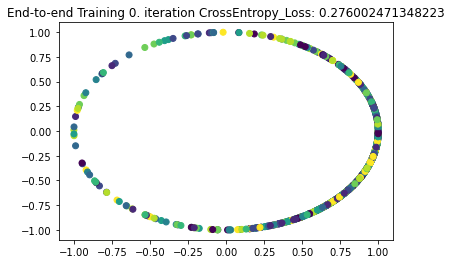

  100|0.258
Iteration  100|loss:0.20711326582684392


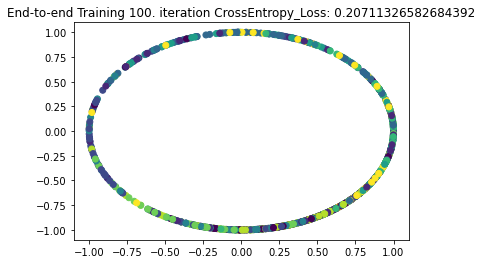

  200|0.345
Iteration  200|loss:0.17760760918750215


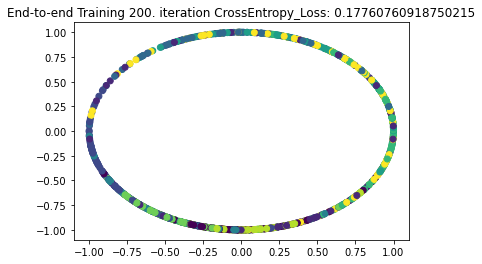

  300|0.383
Iteration  300|loss:0.1685607946924935


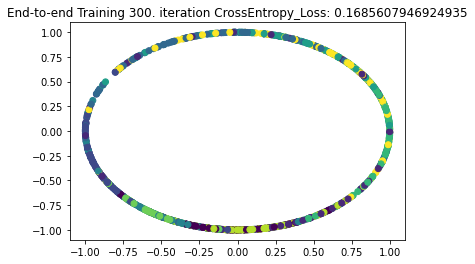

  400|0.522
Iteration  400|loss:0.14453099079569812


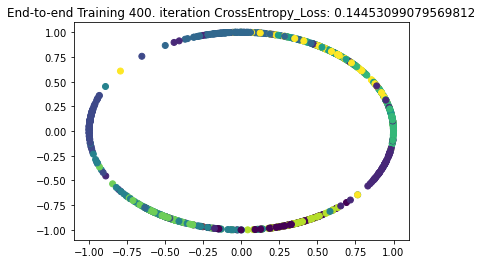

  500|0.55
Iteration  500|loss:0.1389087680121932


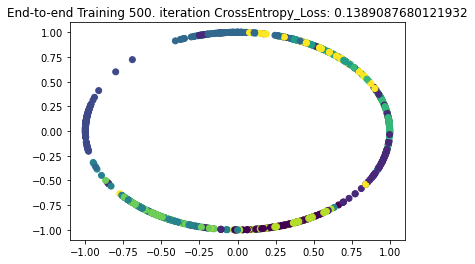

  600|0.561
Iteration  600|loss:0.13124907385515822


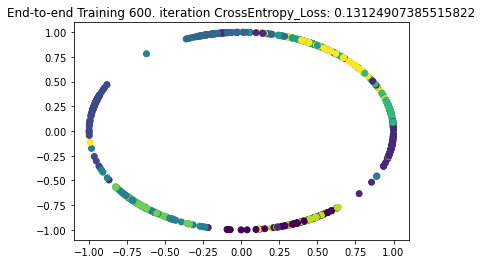

  700|0.592
Iteration  700|loss:0.12653884716826658


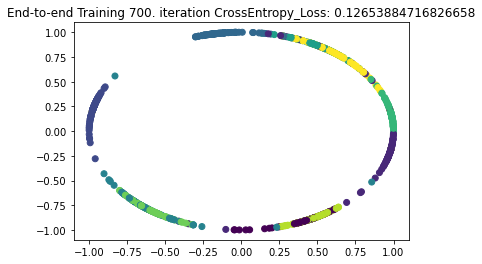

  800|0.601
Iteration  800|loss:0.12093396815726554


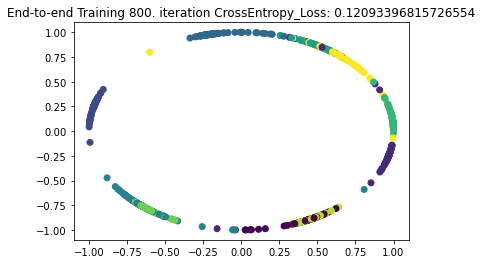

  900|0.606
Iteration  900|loss:0.1165334827537398


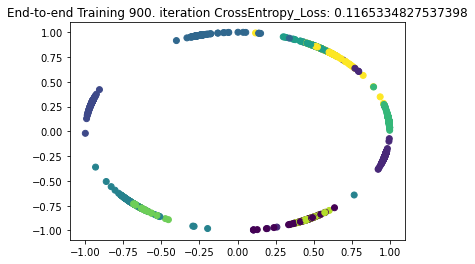

 1000|0.648
Iteration 1000|loss:0.11453721699244201


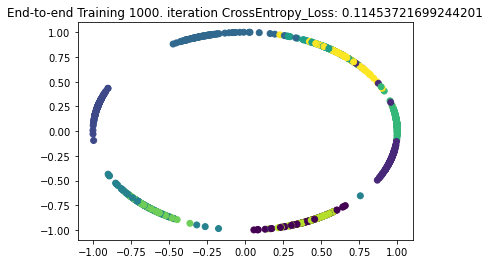

 1100|0.681
Iteration 1100|loss:0.11009882633510422


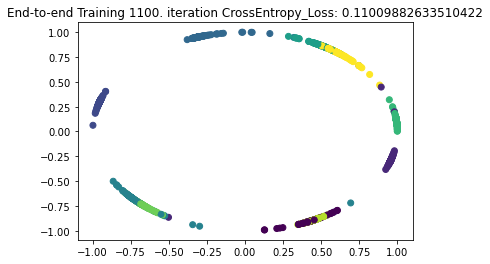

 1200|0.703
Iteration 1200|loss:0.10693813594826518


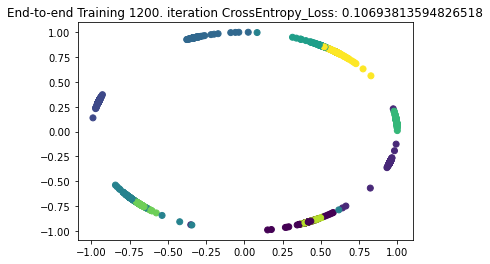

 1300|0.288
Iteration 1300|loss:0.18505188677412748


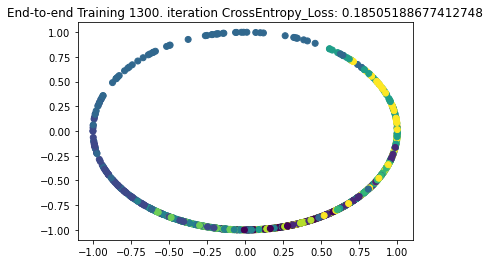

 1400|0.707
Iteration 1400|loss:0.10248248171215982


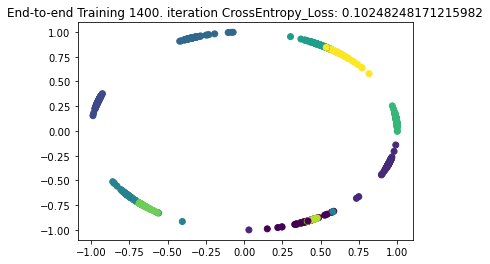

 1500|0.72
Iteration 1500|loss:0.09992104901579166


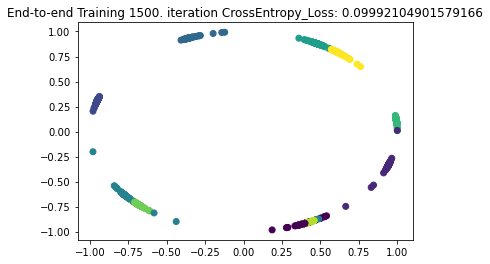

 1600|0.774
Iteration 1600|loss:0.0977598170764825


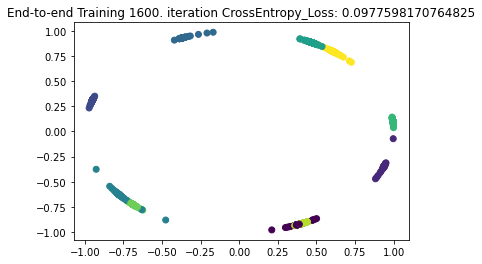

 1700|0.797
Iteration 1700|loss:0.09580199101496359


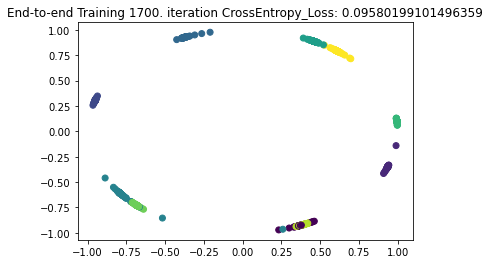

 1800|0.799
Iteration 1800|loss:0.09397145751105024


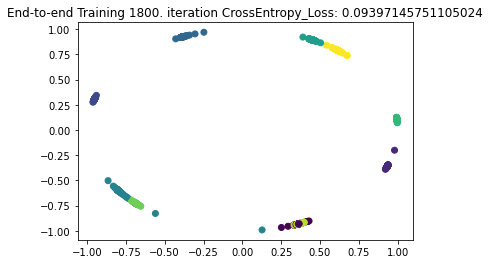

 1900|0.799
Iteration 1900|loss:0.09225354168846707


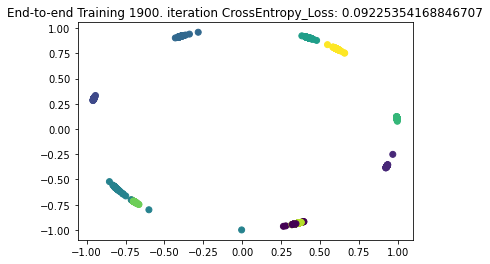

 2000| 0.8
Iteration 2000|loss:0.09060394502553808


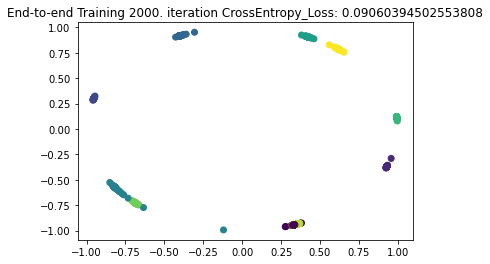

 2100|0.801
Iteration 2100|loss:0.08903389590316751


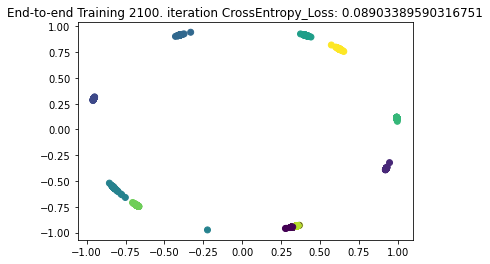

 2200|0.832
Iteration 2200|loss:0.08924468572607347


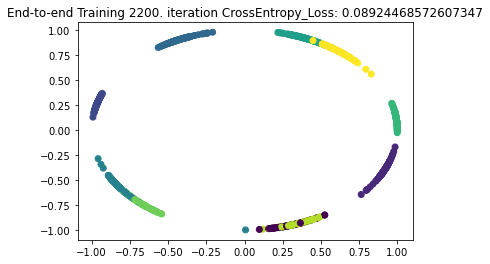

 2300|0.879
Iteration 2300|loss:0.08691888117801118


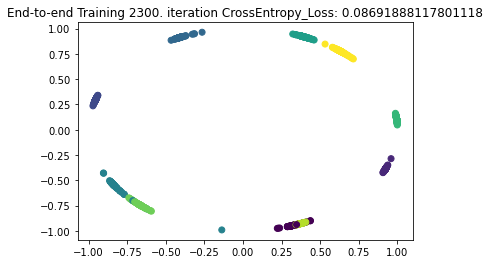

 2400|0.898
Iteration 2400|loss:0.08542021867193232


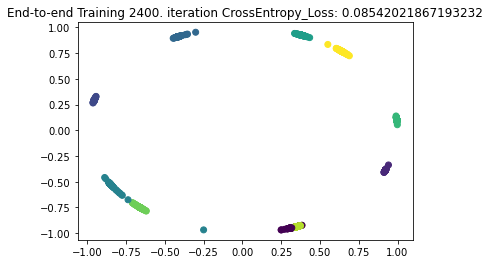

 2500|0.922
Iteration 2500|loss:0.08399909965728523


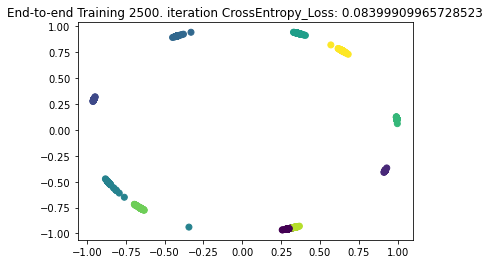

 2600|0.965
Iteration 2600|loss:0.08260865797277715


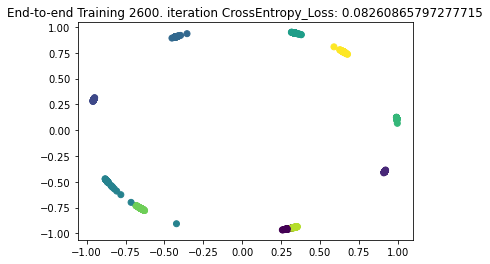

 2700|0.983
Iteration 2700|loss:0.0812347524787184


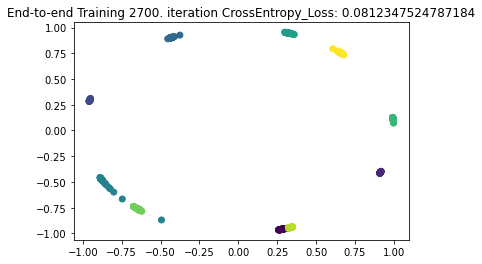

 2800|0.993
Iteration 2800|loss:0.07987301997569425


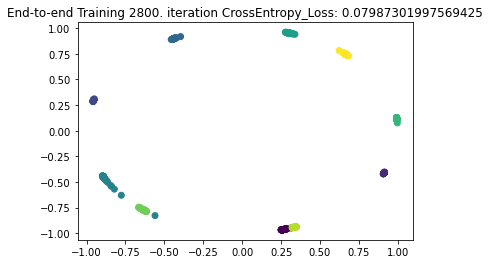

 2900|0.997
Iteration 2900|loss:0.07852366897449176


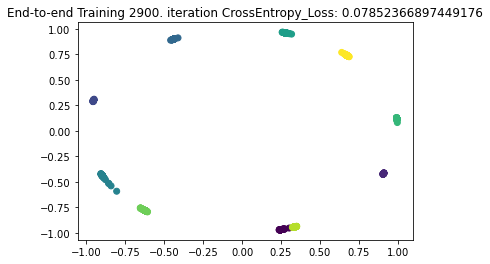

 3500|0.999
Iteration 3500|loss:0.07136447065407218


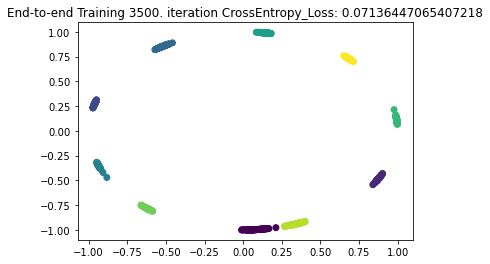

 4000| 1.0
Iteration 4000|loss:0.06620711100034828


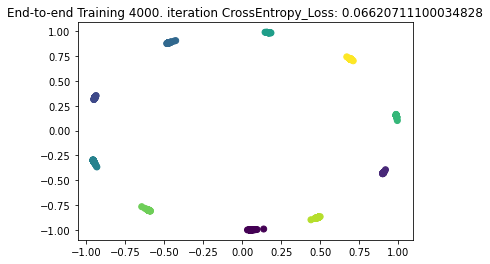

 4500| 1.0
Iteration 4500|loss:0.06127453738847421


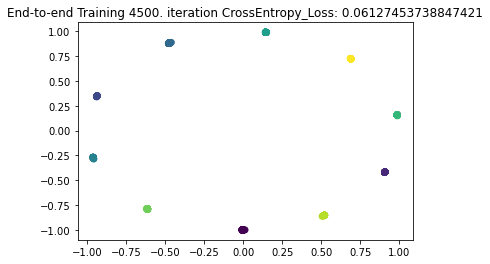

 5000| 1.0
Iteration 5000|loss:0.05870078742241581


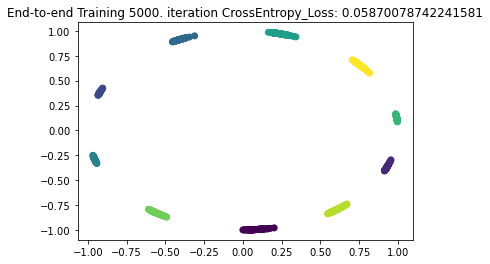

 5500| 1.0
Iteration 5500|loss:0.05277056956892427


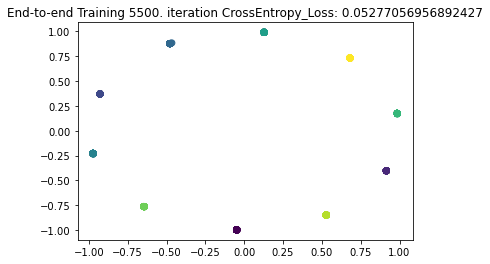

 6000| 1.0
Iteration 6000|loss:0.04913316980044569


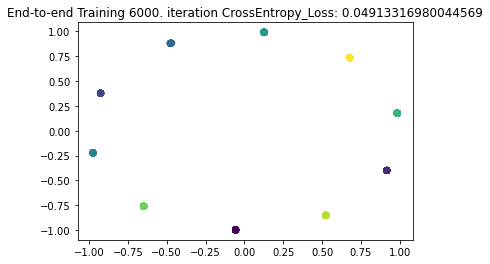

 6500| 1.0
Iteration 6500|loss:0.04563194563994984


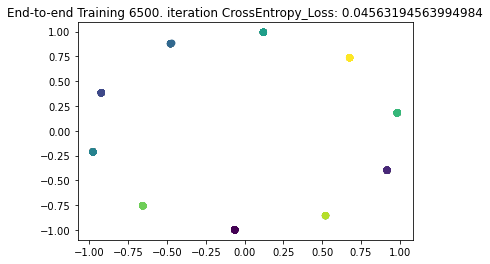

 7000| 1.0
Iteration 7000|loss:0.042414767175788834


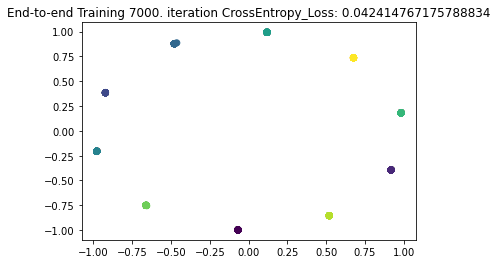

 7500| 1.0
Iteration 7500|loss:0.03936558755380839


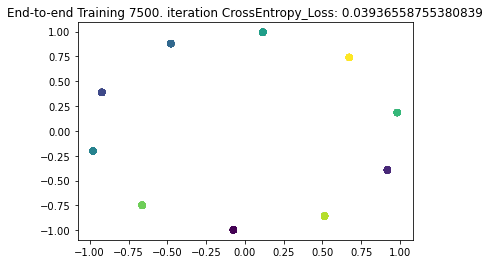

 8000| 1.0
Iteration 8000|loss:0.03721228390455182


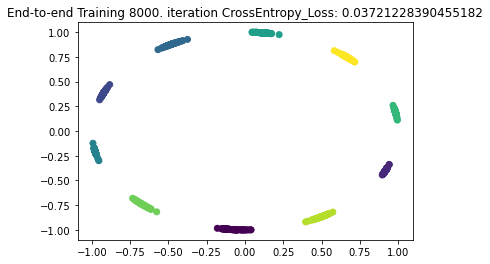

 8500| 1.0
Iteration 8500|loss:0.03446073035906986


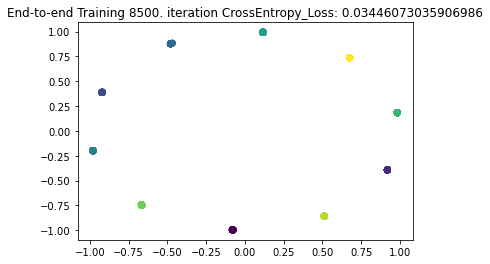

 9000| 1.0
Iteration 9000|loss:0.032127191916043976


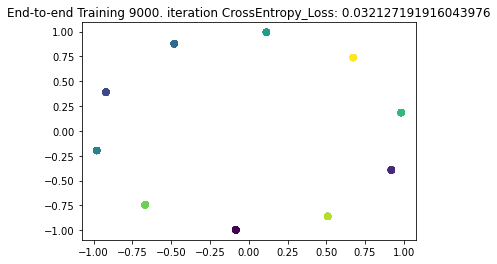

 9500| 1.0
Iteration 9500|loss:0.030446817626635748


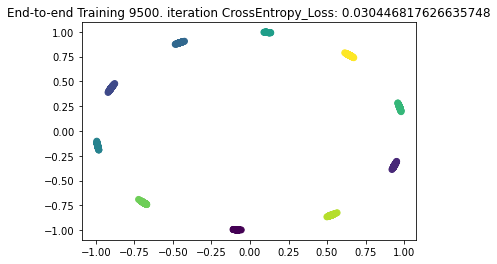

In [2]:
import autograd.numpy as np
import autograd.numpy.random as npr
from autograd import grad
from autograd.misc.optimizers import adam
from matplotlib import axis
import matplotlib.pyplot as plt
from math import e 
layer_sizes = [32,1000,512,2,10]
param_scale=0.1
scale=0.1
sample_size = 1000
n_classes = 10
step_size =0.001
# random, but balanced, labels
if sample_size % n_classes:
    raise('n_classes does not divide sample_size')
n_examples = int(sample_size / n_classes)
y = []
for i in range(n_classes):
    y += [i] * n_examples
# y = npr.permutation(y)
# y_long = y.astype(int)
# x = npr.rand(sample_size, 32)
# x = x.astype(np.float32)
x = np.load("x.npy")
y = np.load("y.npy")
y_long = y.astype(np.int32)
w2=npr.randn(10,2)
b2=np.zeros(10,)


def relu(x):
    out = np.maximum(x,0)
    return out

def tanh(inputs):
    out= np.tanh(inputs)
    return out

def tanh_norm(inputs):
    z = tanh(inputs)
    znorm = z / (np.sqrt(np.sum(np.power(np.abs(z), 2), axis=1, keepdims=True)))
    return znorm

def init_random_params(scale, layer_sizes, rs=npr.RandomState(0)):
    # return [(scale * npr.randn(m, n),   # weight matrix
    #          scale * npr.randn(n))      # bias vector
    #         for m, n in zip(layer_sizes[:-1], layer_sizes[1:])]
    return [(np.load("w0.npy"), np.load("b0.npy")), (np.load("w1.npy"), np.load("b1.npy")),(w2,b2)]

def neural_net_predict(params, inputs):
    W,B = params[0]
    outputs = np.dot(inputs, np.array(W.T)) + np.array(B)
    inputs = relu(outputs)
    W,B = params[1]
    outputs = np.dot(inputs, np.array(W.T)) + np.array(B)
    output_tanh_norm = tanh_norm(outputs)
    W,B = params[2]
    outputs = np.dot(output_tanh_norm, np.array(W.T)) + np.array(B)
    return outputs,output_tanh_norm

def accuracy(params, inputs, targets):
    predicted_class = np.argmax(neural_net_predict(params, inputs)[0], axis=1)
    return np.mean(predicted_class == targets)

def one_hot_encode(target, n_classes):
    
    if target.ndim > 1:
        target = np.squeeze(target)
    target_onehot = np.zeros((target.shape[0], n_classes))
    # target_onehot[range(target.size(0)), target] = 1
    # target_onehot[range(target.size(0)).long(), target.long()] = 1
    target_onehot[range(target.shape[0]), target.astype(int)] = 1
    return target_onehot


def softmax(x):
    out = np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
    return out


def print_perf(params, iter, gradient):
    if (iter % 100 == 0) and iter<3000:
        train_acc = accuracy(params, x, y_long)
        print("{:5}|{:4}".format(iter, train_acc))
        out = neural_net_predict(params,x)[0]
        loss = crossentropy_loss(out, y_long)
        print("Iteration{:5}|loss:{:5}".format(iter, loss))
        new_rep = neural_net_predict(params,x)[1]
        plt.scatter(new_rep[:,0], new_rep[:,1],c=y_long)
        plt.title("End-to-end Training {}. iteration CrossEntropy_Loss: {}".format(iter,loss))
        plt.show()

    elif (iter % 500 == 0) and iter>3000:
        train_acc = accuracy(params, x, y_long)
        print("{:5}|{:4}".format(iter, train_acc))
        out = neural_net_predict(params,x)[0]
        loss = crossentropy_loss(out, y_long)
        print("Iteration{:5}|loss:{:5}".format(iter, loss))
        new_rep = neural_net_predict(params,x)[1]
        plt.scatter(new_rep[:,0], new_rep[:,1],c=y_long)
        plt.title("End-to-end Training {}. iteration CrossEntropy_Loss: {}".format(iter,loss))
        plt.show()

def crossentropy_loss(out, y_long):
    out = np.log(softmax(out))
    y_long = one_hot_encode(y_long, n_classes)
    loss = -y_long*out
    return loss.mean()


def output_module_objective(params,iter):
    out,_ = neural_net_predict(params,x)
    loss = crossentropy_loss(out, y_long)
    return loss

crossentropy_loss_grad = grad(output_module_objective)
step_size = 0.001
init_params = init_random_params(scale,layer_sizes)

optimized_params = adam(crossentropy_loss_grad, init_params, step_size=step_size,num_iters=10000,
                            callback=print_perf)